### Kaggle Compitition Notebook
- Author : Junaid Amin
- Linkdin : https://www.linkedin.com/in/junaid-amin85/
- Github : https://github.com/juneedpk

## Binary Classification of Bank chrun Dataset

In [159]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
# load data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submmision = pd.read_csv('sample_submission.csv')

# check data

df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [161]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [162]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [163]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [164]:
# creating categorical and numerical columns

cat_cols = ['Geography','Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# checking count of unique values in each categorical column

for col in cat_cols:
    print(col, df_train[col].value_counts())
    print('\n')



Geography Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64


Gender Gender
Male      93150
Female    71884
Name: count, dtype: int64


Tenure Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64


NumOfProducts NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64


HasCrCard HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64


IsActiveMember IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64


Exited Exited
0    130113
1     34921
Name: count, dtype: int64




c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


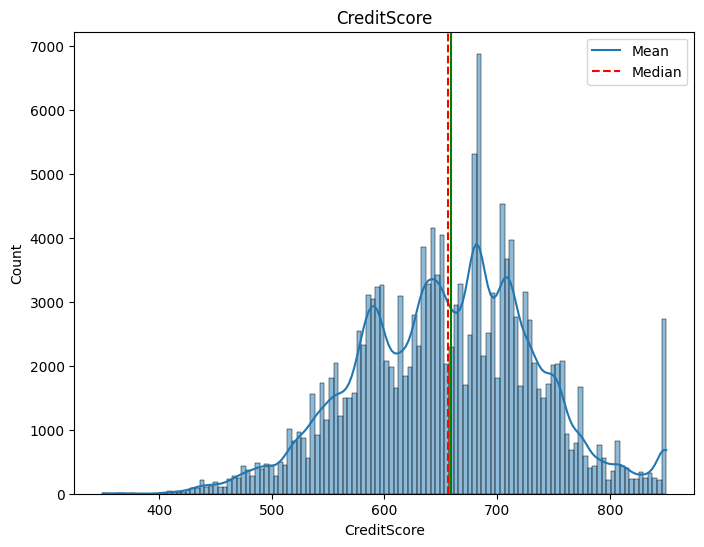

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


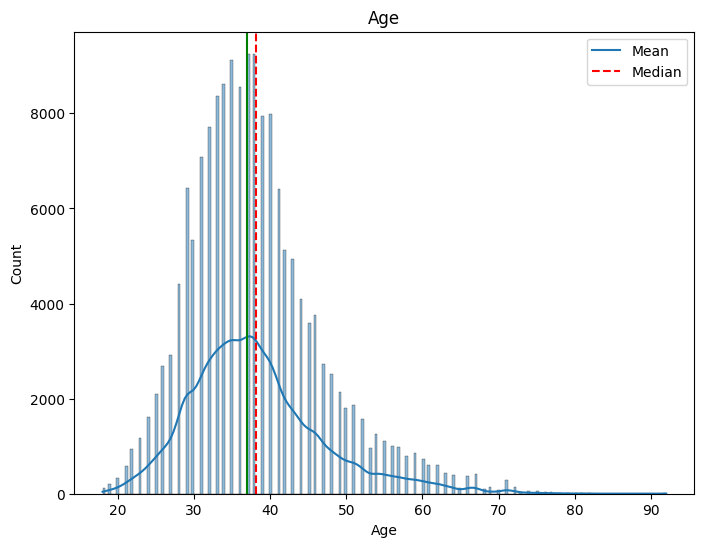

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


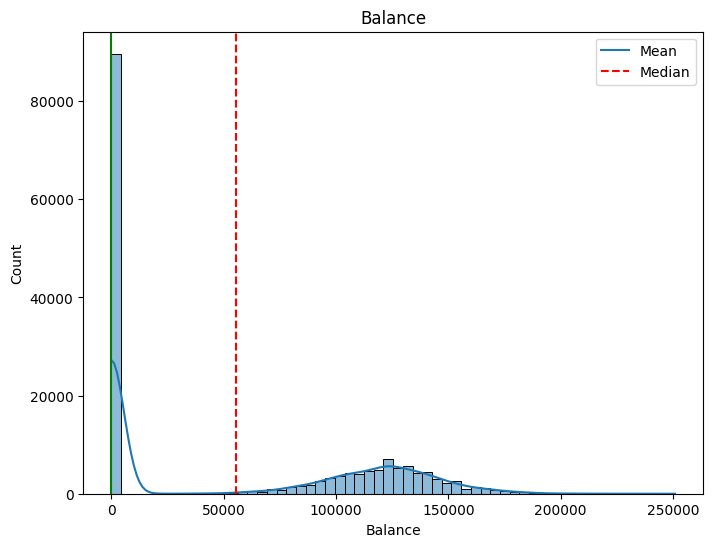

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


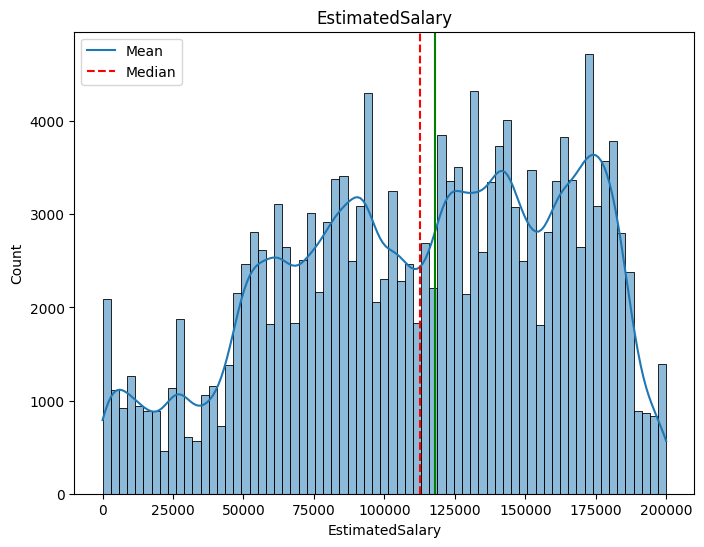

In [165]:
# create histogram of numerical columns with mean and median line

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col], kde=True)
    plt.axvline(df_train[col].mean(), color='red', linestyle='--')
    plt.axvline(df_train[col].median(), color='green', linestyle='-')
    plt.legend({'Mean':df_train[col].mean(), 'Median':df_train[col].median()})
    plt.title(col)
    plt.show()

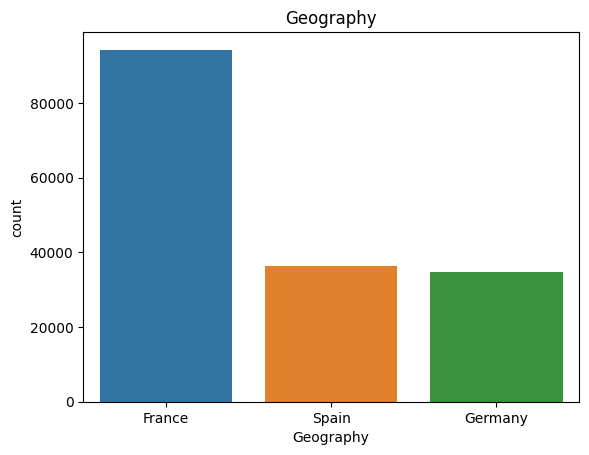

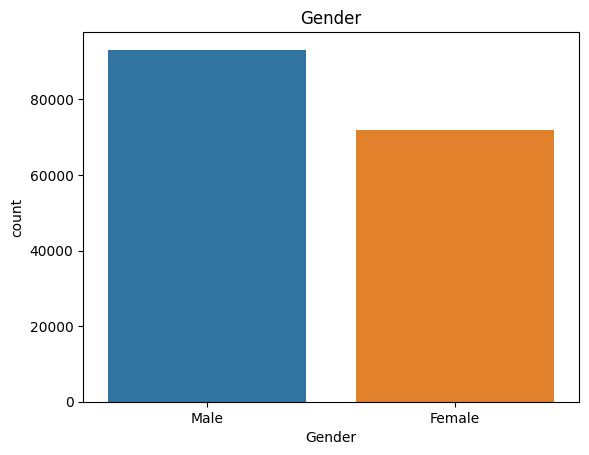

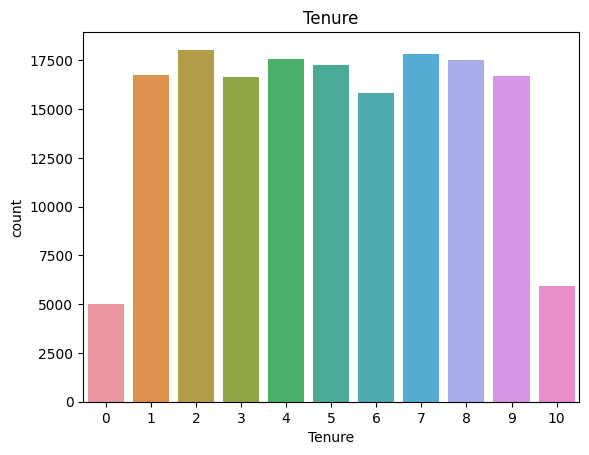

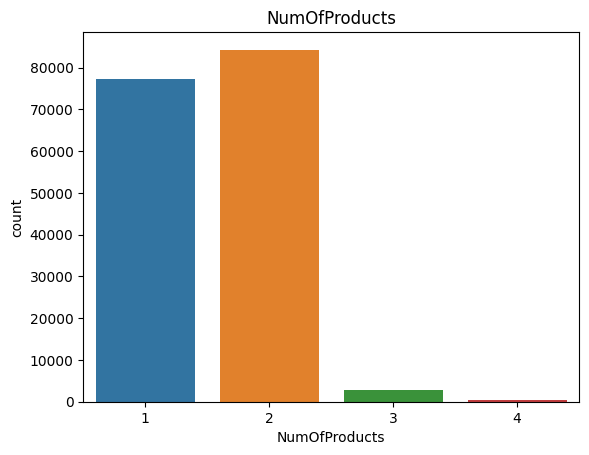

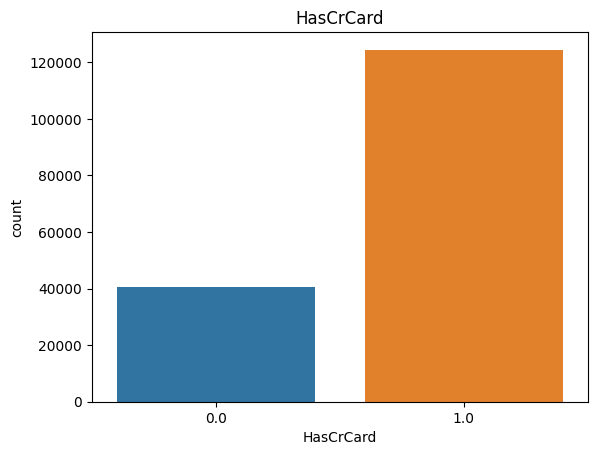

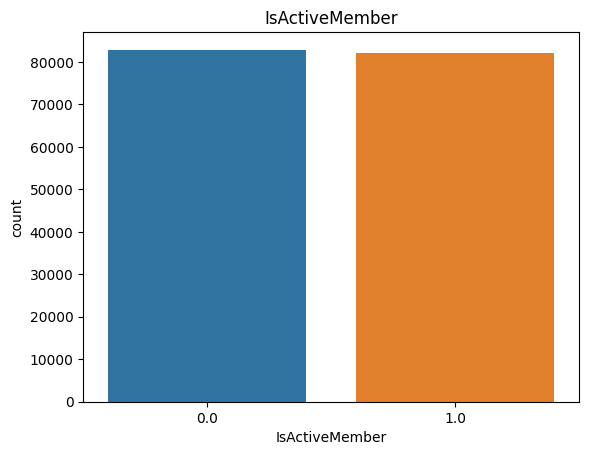

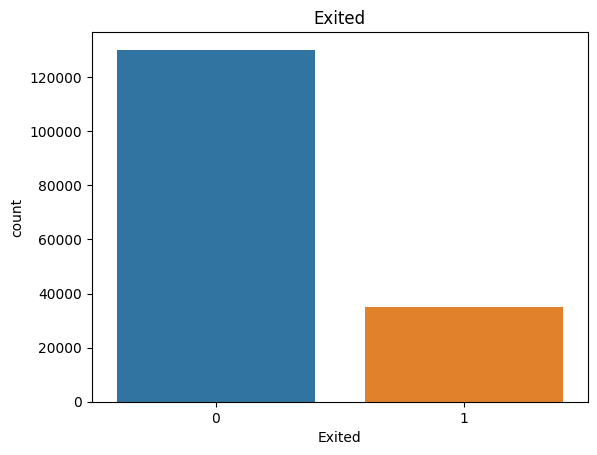

In [166]:
# creating count plot of categorical columns

for col in cat_cols:
    sns.countplot(df_train, x=col)
    plt.title(col)
    plt.show()

In [167]:
# print number of rows and columns in train data

print('Number of rows and columns in train data:', df_train.shape)

Number of rows and columns in train data: (165034, 14)


In [168]:
# encoding categorical columns USing label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['Geography'] = le.fit_transform(df_train['Geography'])
df_train['Gender'] = le.fit_transform(df_train['Gender'])
                                             

In [169]:
# scaling the balnce and estimated salary columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_train['Balance'] = sc.fit_transform(df_train['Balance'].values.reshape(-1, 1))
df_train['EstimatedSalary'] = sc.fit_transform(df_train['EstimatedSalary'].values.reshape(-1, 1))



In [175]:
# split data into features and target

X = df_train.drop(['Exited','Surname','id','CustomerId'], axis=1)
y = df_train['Exited']

# split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create neural network using tensorflow

import tensorflow as tf

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4) # early stopping

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

# evaluate model

accuracy = model.evaluate(X_test, y_test)

print('Accuracy:', accuracy)








c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7651 - loss: 0.6646 - val_accuracy: 0.7897 - val_loss: 0.5772
Epoch 2/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8142 - loss: 0.4325 - val_accuracy: 0.8037 - val_loss: 0.4633
Epoch 3/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8084 - loss: 0.4313 - val_accuracy: 0.8237 - val_loss: 0.4123
Epoch 4/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8104 - loss: 0.4322 - val_accuracy: 0.8168 - val_loss: 0.4181
Epoch 5/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8159 - loss: 0.4233 - val_accuracy: 0.7974 - val_loss: 0.4488
Epoch 6/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8251 - loss: 0.4115 - val_accuracy: 0.8314 - val_loss: 0.3988
Epoch 7/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8304 - loss: 0.4028 - val_accuracy: 0.8341 - val_loss: 0.3907
Epoch 8/20
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8307 - loss: 0

In [176]:
# load test data

df_test = pd.read_csv('test.csv')

# encoding categorical columns USing label encoding

df_test['Geography'] = le.fit_transform(df_test['Geography'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])

# scaling the balnce and estimated salary columns

df_test['Balance'] = sc.fit_transform(df_test['Balance'].values.reshape(-1, 1))
df_test['EstimatedSalary'] = sc.fit_transform(df_test['EstimatedSalary'].values.reshape([-1, 1]))

# make predictions

predictions = model.predict(df_test.drop(['Surname','id','CustomerId'], axis=1))

# create submission file

submmision['Exited'] = predictions

submmision.to_csv('submission.csv', index=False)

# print submission file

print(submmision.head())




3439/3439 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
       id    Exited
0  165034  0.065362
1  165035  0.652427
2  165036  0.025922
3  165037  0.199369
4  165038  0.147995
